 # **ENSEMBLE LEARNING**

This is a technique in machine learning which combines individual models together to improve the stability and predictive power of a model. Two types of ensemble learning are often used: **Homogeneous Ensembles** and **Heterogeneous Ensembles**.




***




### Homogeneous Ensembles

The same algorithm is used in homogeneous ensembles but train multiple models with diffeerent subsets of the data or initial conditions. The common methods used in this ensemble learning are **Bootstrap Aggregating(Bagging) and Boosting**.

#### Bagging

*Random Forrest* is a popular example of ensemble learning which implements bagging applied to decision trees. Bagging is a powerful technique when dealing with high variance models which results overfitting. It reduces variance, improving the predictive performance of models

#### Boosting

High Bias, which results in underfitting, is reduced using boosting algorithms such as *Gradient Boosting*, *Extreme Gradient Boosting(XGB)*.

Boosting is designed to improve the accuracy of machine learning models by combining the predictions of several weak learners to form a stronger learner. Unlike bagging, where models are built independently, boosting builds models sequentially, with each new model focussing on correcting the errors of the previous one.

### Heterogeneous Ensemble

In this type of ensemble learning, different algorithms are combined to create a stronger model. This is often called *Stacking* or *Blending* 
***





### **Homegeneous Ensemble learning**: Using the Bagging and Boosting methods
***

For this approach, *Desicion Tree* is used for the base model as it does not apply ensemble learning in its algorithm. It will be compared with *Random Forest* model which applies the bagging method and *Gradient Boosting* which applies the boosting method. The performance of all three model will be evaluted using the *accuracy_score metric*.   

In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import numpy as np


In [2]:
# Load pre-processed dataset to Dataframe
df = pd.read_csv('african_crisis_data.csv')
df

,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis,country_encoded
0,1870,1,0.052264,0,0,3.441456,0,0,0,0,85
1,1871,0,0.052798,0,0,14.149140,0,0,0,1,85
2,1872,0,0.052274,0,0,-3.718593,0,0,0,1,85
3,1873,0,0.051680,0,0,11.203897,0,0,0,1,85
4,1874,0,0.051308,0,0,-3.848561,0,0,0,1,85
...,...,...,...,...,...,...,...,...,...,...,...
1054,2009,1,354.800000,1,1,-7.670000,1,1,0,0,90
1055,2010,0,378.200000,1,1,3.217000,1,0,0,1,90
1056,2011,0,361.900000,1,1,4.920000,1,0,0,1,90
1057,2012,0,361.900000,1,1,3.720000,1,0,0,1,90


In [6]:
#load dataset
X = df.drop(['systemic_crisis'], axis=1)  #Features
y = df['systemic_crisis']   #Target           

In [7]:
# Define Models
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

In [8]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Train models
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [12]:
# Make Predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)

In [14]:
# Evalute models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

print(f"Accuracy of Decision Tree: {accuracy_dt * 100:.2f}% \n")
print(f"Accuracy of Random Forrest: {accuracy_rf * 100:.2f}% \n")
print(f"Accuracy of Gradient Boosting: {accuracy_gb * 100:.2f}% \n")


Accuracy of Decision Tree: 99.06% 

Accuracy of Random Forrest: 99.53% 

Accuracy of Gradient Boosting: 98.58% 



**Evaluation**
***

It can be seen from the accuracy scores of all three models that Random Forest model, which applies ensemble learning has the best performance. It may be expected that the Gradient Boosting model, another ensemble method, would out-perform the Decision Tree model. 

Since default perameters were used for the Gradient Boosting model, which typically requires hyperparameter tuning as it is sensitive to overfitting, this may explain the suboptimal performance compared to Decision Tree.
***



## **Heterogeneous Ensemble Learning:** Stacking Method
***

For this approach of ensemble learning, the prediction probabitity of each base model(*Random Forest*, *Gradient Boosting*, and *Support Vector Classifier*) on the training set are combined as a new feature set(stacked). The Meta_model(*Logistic Regression*) is used to make the final predictions, using the predictions from the stacked models.
***



In [16]:
#Initializing Scaler for input features
from sklearn.preprocessing import StandardScaler

# Fit and transform the data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [17]:
# Define SVM models

svc_model = SVC(probability=True, random_state=42)

# Train model
svc_model.fit(X_train_sc, y_train)


SVC(probability=True, random_state=42)

In [19]:
# Get predictions from base models
preds_rf = rf_model.predict_proba(X_train)[:,1]
preds_gb = gb_model.predict_proba(X_train)[:,1]
preds_svc = svc_model.predict_proba(X_train_sc)[:,1]

In [20]:
# Stack the predictions as new features for meta-model
stacked_preds = np.column_stack((preds_rf, preds_gb, preds_svc))

# Train meta-model (Logistic Regression) on stacked predictions
meta_model = LogisticRegression()
meta_model.fit(stacked_preds, y_train)

# Get predictions from base models on test set
rf_test_preds = rf_model.predict(X_test)
gb_test_preds = gb_model.predict(X_test)
svc_test_preds = svc_model.predict(X_test_sc)

# Stack the test set predictions
stacked_test_preds = np.column_stack((rf_test_preds, gb_test_preds, svc_test_preds))

# Make final predictions using the meta-model
final_preds = meta_model.predict(stacked_test_preds)

# Evaluate the accuracy of the stacked model
accuracy = accuracy_score(y_test, final_preds)
print(f"Accuracy of Stacking Model: {accuracy * 100:.2f}%")


Accuracy of Stacking Model: 98.58%


# **SUMMARY REPORT**
***

#### 1. Summary of Results Evaluation



| **Model**           | **Ensemble Method** | **Accuracy Score** |
|---------------------|---------------------|--------------------|
| Decision Tree        | N/A (Base Model)    | 99.06%             |
| Random Forest        | Bagging             | 99.53%             |
| Gradient Boosting    | Boosting            | 98.58%             |
| Stacking Model       | Stacking (SVC, RF, GB as base models, Logistic Regression as meta model) | 98.58% |


#### 2. Visualization of Results

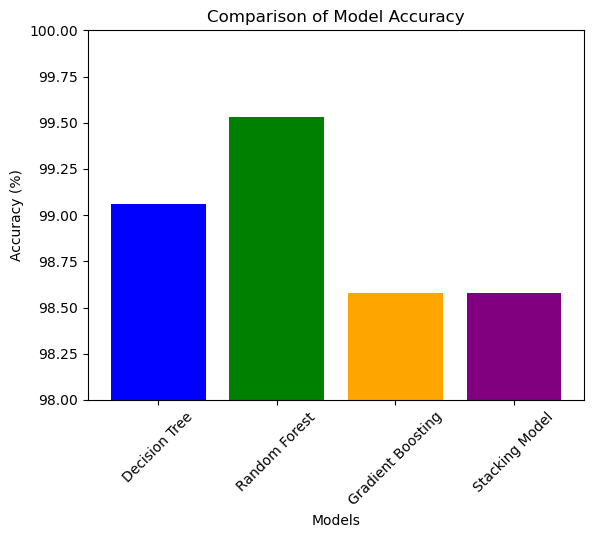

In [23]:
import matplotlib.pyplot as plt

# Model names and accuracy scores
models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'Stacking Model']
accuracy_scores = [99.06, 99.53, 98.58, 98.58]

# Plot bar chart
plt.xticks(rotation=45)
plt.bar(models, accuracy_scores, color=['blue', 'green', 'orange', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Model Accuracy')
plt.ylim(98.0, 100.0)  # Set the y-axis limits for better visualization
plt.show()


#### 3. Interpretation and Explanation:

Decision Tree (Baseline Model): Achieved an accuracy of 99.06%. It’s the simplest model and provides a good baseline, but it’s more prone to overfitting.

Random Forest (Bagging Method): With an accuracy of 99.53%, Random Forest improves on the decision tree by using an ensemble of trees, reducing variance and improving performance.

Gradient Boosting (Boosting Method): The Gradient Boosting model performs slightly worse than Random Forest with an accuracy of 98.58%. It focuses on iteratively correcting the errors of previous models, but it can be more prone to overfitting with complex datasets.

Stacking Model (Meta-Learning): The Stacking Model, which combines SVC, Random Forest, and Gradient Boosting as base models, and uses Logistic Regression as the meta model, also achieved an accuracy of 98.58%. While it doesn’t outperform Random Forest in this case, the stacking method combines the strengths of different models and can potentially offer more stability and robustness for more complex tasks.